# Basic Text Processing 

['Natural', 'Language', 'Processing', 'with', 'Python', 'is', 'amazing', '.', 'It', 'allows', 'you', 'to', 'process', 'text', 'data', 'in', 'various', 'ways', '.']
filtered tokens: ['Natural', 'Language', 'Processing', 'Python', 'amazing', '.', 'allows', 'process', 'text', 'data', 'various', 'ways', '.']
Counter({'.': 2, 'Natural': 1, 'Language': 1, 'Processing': 1, 'Python': 1, 'amazing': 1, 'allows': 1, 'process': 1, 'text': 1, 'data': 1, 'various': 1, 'ways': 1})


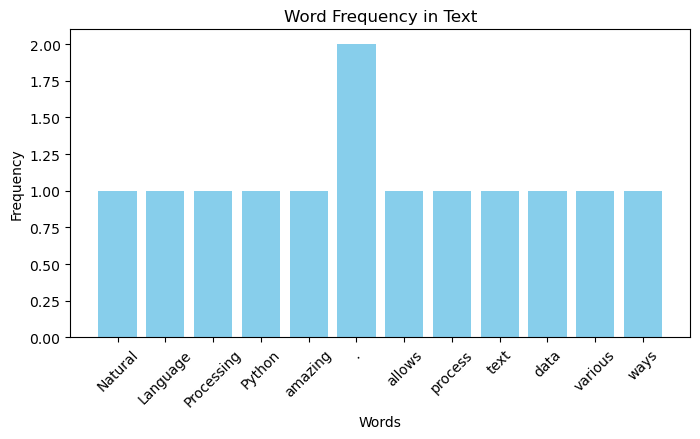

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample text
text = "Natural Language Processing with Python is amazing. It allows you to process text data in various ways."

# Tokenization
tokens = word_tokenize(text)
print(tokens)

# Removing stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("filtered tokens:", filtered_tokens)

# Counting word frequencies
word_counts = Counter(filtered_tokens)
print(word_counts)

# Extracting words and counts for plotting
words = list(word_counts.keys())
counts = list(word_counts.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Text')
plt.xticks(rotation=45)
plt.show()

# Step by Step Cleaning Data

In [2]:
#importing dataset
import pandas as pd
df = pd.read_csv("Sentiment Analysis Dataset Small.csv", encoding='latin-1')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


# Converting to Lower Case

In [3]:
#creating a new column for this and then all the pre processing will done by that column
df['clean_text'] = df['SentimentText'].str.lower()
df.head()

,ItemID,Sentiment,SentimentText,clean_text
0,1,0,is so sad for my APL frie...,is so sad for my apl frie...
1,2,0,I missed the New Moon trail...,i missed the new moon trail...
2,3,1,omg its already 7:30 :O,omg its already 7:30 :o
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. omgaga. im sooo im gunna cry. i'...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...


# Remove Punctuations from the text

In [4]:
import string
#showing the punctuations that will be removed
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
#Making a function for removing the punct's
def remove_punctuations(text):
    punctuations = string.punctuation
    text = text.translate(str.maketrans('','', punctuations))
    return text

In [6]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuations(x))
df.sample(frac=1).head() #shuffle the data

,ItemID,Sentiment,SentimentText,clean_text
113,114,1,- that explains alot.,that explains alot
230,231,1,' @minghao Maybe you can pop @StarHubCares a t...,minghao maybe you can pop starhubcares a twee...
21,22,0,wompppp wompp,wompppp wompp
261,262,0,i want an octo drive,i want an octo drive
207,208,1,@Hijack_King7 I hope u have cheeSe burgerS 4 ...,hijackking7 i hope u have cheese burgers 4 sn...


# Removing Stopwords

In [7]:
from nltk.corpus import stopwords
#showing the stopwords that will be removed
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
','.join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [9]:
# making a function to remove the stopwords
StopWords = set(stopwords.words('english'))
def remove_stopwords(text):
    #stopwords will replace by " " empty string
    text = ' '.join([word for word in text.split() if word not in StopWords])
    return text

In [10]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))
df.head() 

,ItemID,Sentiment,SentimentText,clean_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already 730
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry ive dentist since ...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating tt


# Removal of frequent words

In [11]:
# looking how many time a word occurs in the dataset
from collections import Counter
word_count = Counter()

for text in df['clean_text']:
    for word in text.split():
        word_count[word] += 1

word_count.most_common(10)
#print(type(word_count))

[('im', 49),
 ('go', 26),
 ('want', 25),
 ('day', 24),
 ('like', 24),
 ('get', 23),
 ('going', 19),
 ('new', 15),
 ('miss', 15),
 ('love', 15)]

In [12]:
# removing the top 2 words in the dataset
frequent_words = set(word for (word, wc) in word_count.most_common(2))
# defining a function to remove the frequent words top 2 like we did for stop words
def remove_freq_words(text):
    #replacing by an empty string
    text = ' '.join(word for word in text.split() if word not in frequent_words)
    return text

In [13]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_freq_words(x))
df.head(10) 

,ItemID,Sentiment,SentimentText,clean_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already 730
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry ive dentist since 11 sup...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating tt
5,6,0,or i just worry too much?,worry much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,sunny work tomorrow tv tonight
8,9,1,handed in my uniform today . i miss you ...,handed uniform today miss already
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number


# Removing the rare words

In [14]:
#removing least common words
#showing the least common words with its occurence
rare_words = set((word, wc) for (word, wc) in word_count.most_common()[:-10:-1]) #last 10 items
rare_words

{('360', 1),
 ('630whats', 1),
 ('britain', 1),
 ('came', 1),
 ('copy', 1),
 ('difference', 1),
 ('free', 1),
 ('ovelt33', 1),
 ('wit', 1)}

In [15]:
#removing these words
rare_words = set(word for (word, wc) in word_count.most_common()[:-10:-1]) #last 10 items
rare_words

{'360',
 '630whats',
 'britain',
 'came',
 'copy',
 'difference',
 'free',
 'ovelt33',
 'wit'}

In [16]:
#making a function for this as well like before
def remove_rare_words(text):
    #replacing by an empty string
    text = ' '.join(word for word in text.split() if word not in rare_words)
    return text

In [17]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_rare_words(x))
df.head() 

,ItemID,Sentiment,SentimentText,clean_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already 730
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry ive dentist since 11 sup...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating tt


# Removing Special Characters using Regular Expressions

In [18]:
import re #regular expression
#making a function
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text) #this will only remain a to z small A- to Z capital and 0 to 9 and everything else will replace by ' ' space
    text = re.sub('\s+', ' ', text) # spaces more than one will be replace to only one space '    ' ---> ' '
    return text

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Asad\AppData\Local\Temp\ipykernel_8568\1628937061.py:5: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text) # spaces more than one will be replace to only one space '    ' ---> ' '


In [19]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_spl_chars(x))
df.head(10) 

,ItemID,Sentiment,SentimentText,clean_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already 730
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry ive dentist since 11 sup...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating tt
5,6,0,or i just worry too much?,worry much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,sunny work tomorrow tv tonight
8,9,1,handed in my uniform today . i miss you ...,handed uniform today miss already
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number


# Normalization 1st technique Stemming

In [20]:
  #stemming is to change the words into its base form like motivation to motivate

In [21]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Function to stem the words
def stem_words(text):
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [22]:
#we will create a new column to see the stemmed words
df['stemmed_text'] = df['clean_text'].apply(lambda x: stem_words(x))
df.head(8)

,ItemID,Sentiment,SentimentText,clean_text,stemmed_text
0,1,0,is so sad for my APL frie...,sad apl friend,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer,miss new moon trailer
2,3,1,omg its already 7:30 :O,omg already 730,omg alreadi 730
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry ive dentist since 11 sup...,omgaga sooo gunna cri ive dentist sinc 11 supo...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating tt,think mi bf cheat tt
5,6,0,or i just worry too much?,worry much,worri much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,sunny work tomorrow tv tonight,sunni work tomorrow tv tonight


# Normalization 2nd technique Lemmatization

In [23]:
#Lemmatization is better because it care for parts of speech and change the word to correct base words

In [24]:
#nltk.download("wordnet")
#nltk.download('averaged_perceptron_tagger')

In [25]:
#importing stuff
from nltk import pos_tag #part of speech tags.. in lemmatization it also look at part of speeches
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#initiate lemmatizer
lemmatizer = WordNetLemmatizer()

#part of speech dictionary creating
wordnet_map = {'N':wordnet.NOUN, 'V': wordnet.VERB, 'J': wordnet.ADJ, 'R': wordnet.ADV}

In [26]:
#function to lemmtize text
def lemmatize_words(text):
    #finding part of speech tag
    pos_text = pos_tag(text.split())
    #lemmatizing the word now
    text = ' '.join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])
    return text

In [27]:
# txt = 'Home is Beautiful'
# pos_txt = pos_tag(txt.split())
# pos_txt

In [28]:
#we will create a new column to see the lemmatize words
df['lemmatized_text'] = df['clean_text'].apply(lambda x: lemmatize_words(x))
df.head(8)

,ItemID,Sentiment,SentimentText,clean_text,stemmed_text,lemmatized_text
0,1,0,is so sad for my APL frie...,sad apl friend,sad apl friend,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer,miss new moon trailer,miss new moon trailer
2,3,1,omg its already 7:30 :O,omg already 730,omg alreadi 730,omg already 730
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry ive dentist since 11 sup...,omgaga sooo gunna cri ive dentist sinc 11 supo...,omgaga sooo gunna cry ive dentist since 11 sup...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating tt,think mi bf cheat tt,think mi bf cheat tt
5,6,0,or i just worry too much?,worry much,worri much,worry much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin,juuuuuuuuuuuuuuuuussssst chillin,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,sunny work tomorrow tv tonight,sunni work tomorrow tv tonight,sunny work tomorrow tv tonight


In [29]:
#lets shuffle the data to view more
df.sample(frac=1).head()

,ItemID,Sentiment,SentimentText,clean_text,stemmed_text,lemmatized_text
207,208,1,@Hijack_King7 I hope u have cheeSe burgerS 4 ...,hijackking7 hope u cheese burgers 4 snubbmatic...,hijackking7 hope u chees burger 4 snubbmat lmbo,hijackking7 hope u cheese burger 4 snubbmatic ...
263,264,0,i want to find a way to put my photos on ph...,want find way put photos phone bluetooth phone...,want find way put photo phone bluetooth phone ...,want find way put photo phone bluetooth phone ...
122,123,0,"Went to get dog from vets, theyve stitched h...",went get dog vets theyve stitched ear charged ...,went get dog vet theyv stitch ear charg us sti...,go get dog vet theyve stitch ear charge u stil...
22,23,1,You're the only one who can see this cause...,youre one see cause one else following youre p...,your one see caus one els follow your pretti a...,youre one see cause one else follow youre pret...
18,19,0,HUGE roll of thunder just now...SO scary!!!!,huge roll thunder nowso scary,huge roll thunder nowso scari,huge roll thunder nowso scary


# Removing URLs

In [30]:
#using regular expression to remove urls
def remove_url(text):
    #print('text: ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    return text

In [31]:
#we will remove urls patterns using RE
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: remove_url(x))
#lets shuffle the data to view more
df.sample(frac=1).head()

,ItemID,Sentiment,SentimentText,clean_text,stemmed_text,lemmatized_text
378,379,1,I want to write a song. I think I will.,want write song think,want write song think,want write song think
126,127,0,Why Twitter will soon become obsolete? http:...,twitter soon become obsolete httpwwwimediaconn...,twitter soon becom obsolet httpwwwimediaconnec...,twitter soon become obsolete httpwwwimediaconn...
454,455,0,my head is killing meee,head killing meee,head kill meee,head killing meee
154,155,1,-- *hummin* I SAY &quot;shut up &amp; put your...,hummin say quotshut amp put money mouth isquot...,hummin say quotshut amp put money mouth isquot...,hummin say quotshut amp put money mouth isquot...
481,482,1,am excited,excited,excit,excited


# Removing HTML tags

In [32]:
#removing using regular expression
def remove_html_tags(text):
    text = re.sub(r'<.*?>', '', text)
    return text

In [33]:
#we will remove html tags if it have any, 
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: remove_html_tags(x))
#lets shuffle the data to view more
df.sample(frac=1).head()

,ItemID,Sentiment,SentimentText,clean_text,stemmed_text,lemmatized_text
273,274,0,rain rain go away!,rain rain away,rain rain away,rain rain away
106,107,0,"RIP, David Eddings.",rip david eddings,rip david ed,rip david eddings
224,225,0,@lorinimus hates Bebot App,lorinimus hates bebot app,lorinimu hate bebot app,lorinimus hates bebot app
186,187,1,@CharlottegC I just saw ur mum,charlottegc saw ur mum,charlottegc saw ur mum,charlottegc saw ur mum
28,29,1,"goodbye exams, HELLO ALCOHOL TONIGHT",goodbye exams hello alcohol tonight,goodby exam hello alcohol tonight,goodbye exams hello alcohol tonight


# Spelling Correction

In [34]:
#!pip install pyspellchecker
#from textblob import download_corpora
#download_corpora.download_all()

In [35]:
#using TEXT BLOB Library to correct spellings
# from textblob import TextBlob

# def correct_spelling(text):
#     """
#     This function accepts a text input, corrects the spelling of misspelled words,
#     and returns the corrected text.

#     Parameters:
#     text (str): The input text with potential spelling errors.

#     Returns:
#     str: The text with corrected spelling.
#     """
#     blob = TextBlob(text)
#     corrected_text = str(blob.correct())
#     return corrected_text

# Example usage
# input_text = "This is a smple text with sme speling erors."
# corrected_text = correct_spelling(input_text)
# print("Original Text: ", input_text)
# print("Corrected Text:", corrected_text)


In [39]:
from spellchecker import SpellChecker

def correct_spelling(text):
    """
    This function accepts a text input, corrects the spelling of misspelled words,
    and returns the corrected text.

    Parameters:
    text (str): The input text with potential spelling errors.

    Returns:
    str: The text with corrected spelling.
    """
    spell = SpellChecker()
    words = text.split()
    corrected_words = []

    for word in words:
        # Check if the word is misspelled
        if word in spell:
            corrected_words.append(word)
        else:
            # Correct the word and ensure it is not None
            corrected_word = spell.correction(word)
            if corrected_word is not None:
                corrected_words.append(corrected_word)
            else:
                corrected_words.append(word)  # Keep the original word if no correction is found
    
    # Join the corrected words back into a single string
    corrected_text = ' '.join(corrected_words)
    return corrected_text

# Example usage
# input_text = "This is a smple text with sme speling erors."
# corrected_text = correct_spelling(input_text)
# print("Original Text: ", input_text)
# print("Corrected Text:", corrected_text)


In [40]:
#we will correct the spellings if it have any, 
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: correct_spelling(x))
#lets shuffle the data to view more
df.sample(frac=1).head()

,ItemID,Sentiment,SentimentText,clean_text,stemmed_text,lemmatized_text
431,432,1,Goodbassplayer... that is funny.... ;) OilI...,goodbassplayer funny oilipo hope people bring ...,goodbassplay funni oilipo hope peopl bring us ...,goodbassplayer funny oiling hope people bring ...
12,13,0,this weekend has sucked so far,weekend sucked far,weekend suck far,weekend sucked far
392,393,0,@warbo is off clubbing... must come over to s...,warbo clubbing must come sheffield sometime am...,warbo club must come sheffield sometim amp par...,war clubbing must come sheffield sometime amp ...
344,345,0,angry,angry,angri,angry
52,53,1,boom boom pow,boom boom pow,boom boom pow,boom boom pow


In [43]:
#lets shuffle the data to view more
df.head(10)

,ItemID,Sentiment,SentimentText,clean_text,stemmed_text,lemmatized_text
0,1,0,is so sad for my APL frie...,sad apl friend,sad apl friend,sad all friend
1,2,0,I missed the New Moon trail...,missed new moon trailer,miss new moon trailer,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already 730,omg alreadi 730,om already 730
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry ive dentist since 11 sup...,omgaga sooo gunna cri ive dentist sinc 11 supo...,omega soon gonna cry give dentist since 11 sup...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating tt,think mi bf cheat tt,think mi of cheating to
5,6,0,or i just worry too much?,worry much,worri much,worry much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin,juuuuuuuuuuuuuuuuussssst chillin,juuuuuuuuuuuuuuuuussssst chilling
7,8,0,Sunny Again Work Tomorrow :-| ...,sunny work tomorrow tv tonight,sunni work tomorrow tv tonight,sunny work tomorrow to tonight
8,9,1,handed in my uniform today . i miss you ...,handed uniform today miss already,hand uniform today miss alreadi,handed uniform today miss already
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number,hmmmm wonder number,hammy wonder number


# Removing words that starts from http

In [45]:
import re

def remove_http_words(text):
    """
    This function accepts a text input, removes all words starting with 'HTTP' or 'http',
    and returns the cleaned text.

    Parameters:
    text (str): The input text with potential HTTP/https URLs.

    Returns:
    str: The text with all HTTP/https URLs removed.
    """
    # Regular expression to find words starting with HTTP or http
    http_pattern = re.compile(r'\bhttp\S*', re.IGNORECASE)
    # Remove matching words from the text
    cleaned_text = re.sub(http_pattern, '', text)
    # Remove extra spaces that might be left
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Example usage
# input_text = "Check out this link http://example.com and this one HTTPS://anotherexample.com"
# cleaned_text = remove_http_words(input_text)
# print("Original Text: ", input_text)
# print("Cleaned Text:", cleaned_text)


In [54]:
#we will remove words starting from http, 
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: remove_http_words(x))
#lets shuffle the data to view more
df.sample(frac=1).head()

,ItemID,Sentiment,SentimentText,clean_text,stemmed_text,lemmatized_text
406,407,0,a big angry spider was crawling in my blankey...,big angry spider crawling blankeys flicked flo...,big angri spider crawl blankey flick floor can...,big angry spider crawling blankets flicked flo...
199,200,0,"- @EvertB which one? http://bit.ly/10o8LW, htt...",evertb one httpbitly10o8lw httpbitlynh82s http...,evertb one httpbitly10o8lw httpbitlynh82 httpb...,evert one latter us store phone comics
144,145,0,&quot;I want you so bad it's driving me mad&...,quoti want bad driving madquot,quoti want bad drive madquot,quote want bad driving madquot
178,179,1,' @ Thestreetforce ',thestreetforce,thestreetforc,thestreetforce
309,310,0,Curtain drops at the Crown Uptown after 32 ...,curtain drops crown uptown 32 ye httpwwwkansas...,curtain drop crown uptown 32 ye httpwwwkansasc...,curtain drops crown uptown 32 ye
